In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [3]:
 rose=pd.read_csv("Titanic-Dataset.csv")

In [5]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
rose.shape

(891, 12)

In [7]:
print(rose.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
rose.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
rose.drop(columns=['Cabin'],axis=1,inplace=True)

In [10]:


print(rose['Embarked'].mode)

<bound method Series.mode of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


In [11]:

rose.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
rose['Survived'].value_counts()


,count
Survived,
0,549
1,342


<Axes: xlabel='Pclass', ylabel='count'>

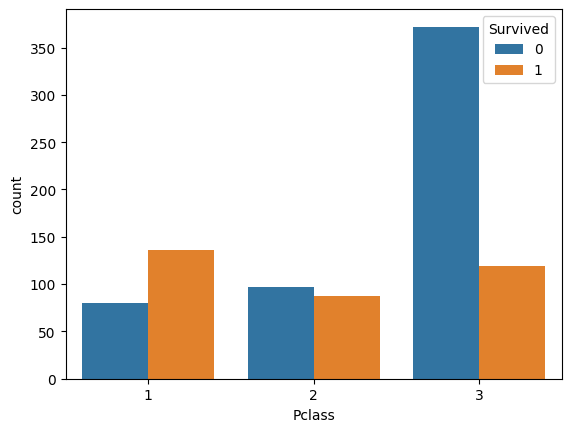

In [13]:
sns.countplot(x='Pclass',hue='Survived',data=rose)

<Axes: xlabel='Sex', ylabel='count'>

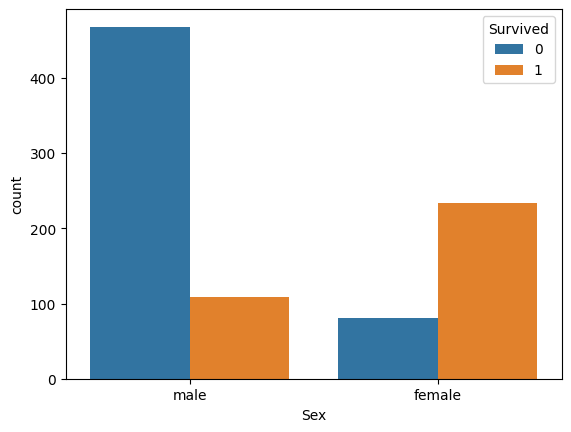

In [14]:

sns.countplot(x='Sex',hue='Survived',data=rose)

In [15]:
jack=LabelEncoder()
rose['Sex']=jack.fit_transform(rose['Sex'])
rose['Embarked']=jack.fit_transform(rose['Embarked'])


In [16]:
x=rose.drop(columns=['Name','Survived','PassengerId','Ticket','Fare'])
y=rose['Survived']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
x_train['Age'] = pd.to_numeric(x_train['Age'], errors='coerce')
x_test['Age'] = pd.to_numeric(x_test['Age'], errors='coerce')

In [21]:


x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)
x_test['Age'].fillna(x_test['Age'].mean(),inplace=True)
print(y_train.shape)

(712,)


<ipython-input-21-48dc2b4de46e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Age'].fillna(x_train['Age'].mean(),inplace=True)
<ipython-input-21-48dc2b4de46e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [23]:
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
train_x = set.predict(x_train)

In [26]:
t_score = accuracy_score(y_train,train_x)
print('Train Accuracy score : ',t_score)

Train Accuracy score :  0.8117977528089888


In [27]:
x_pred = set.predict(x_test)

In [28]:
fin_score = accuracy_score(y_test,x_pred)
print('Test Accuracy score : ',t_score)

Test Accuracy score :  0.8117977528089888
